<a href="https://colab.research.google.com/github/pritam421/New-Employee-Salary-Prediction/blob/main/Emp_Sal_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

You have to share the .ipynb file in which you will perform all of the required steps this file
should also contain the answer of following question (you can use markdown option to answer
these questions in same notebook)
1. Your views about the problem statement?
2. What will be your approach to solving this task?
3. What were the available ML model options you had to perform this task?
4. Which model’s performance is best and what could be the possible reason for that?
5. What steps can you take to improve this selected model’s performance even further?

### Aproach to handle or solve this business requirement
1. We have 3 tables/ datasets which are given
*  Employment data
*  Cities
*  College


3. will be performing encoding & scalling techniques
4. Perform EDA
5. Model Building
6. Model Evaluation with diff model evaluation techniques like MSE,MAE,Performance Metrics, etc

***Since Salary Prediction is a Regression Problem so will be focasing on Regression Algorithms Only***


In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/ML case Study.csv')
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [7]:
# Chking some basic data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [8]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [2]:
college=pd.read_csv('/content/Colleges.csv')
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [9]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [3]:
cities=pd.read_csv('/content/cities.csv')
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [10]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [11]:
# Extract data from the "Tier 1," "Tier 2," and "Tier 3" columns of the 'college' DataFrame
# and store them in separate lists 'Tier1,' 'Tier2,' and 'Tier3' for further analysis.

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [12]:
# Assign tier values to colleges in the DataFrame based on their tier classification
# - If a college is in 'Tier1', set its value to 3
# - If a college is in 'Tier2', set its value to 2
# - If a college is in 'Tier3', set its value to 1
# Tier1 college get value of 3 and tier 3 of 1 because tier1 college has higher weightage then 2 and 3.

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

In [13]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,1,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,1,Ajmer,Executive,49010.0,2,81,33,82092.39
4,3,Durgapur,Executive,57879.0,4,74,32,73878.10


In [14]:
# Extracting lists of metro and non-metro cities from the 'cities' DataFrame

metro = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()

In [15]:
# Repeating previous steps and assigning value as 1 if city is merto and 0 if non metro

for item in df.City:
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

In [16]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [17]:
# Converting Categorical column 'Role' into numerical

df = pd.get_dummies(df, drop_first=True)

In [18]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,1,0,60347.0,2,52,28,76764.02,0
3,1,0,49010.0,2,81,33,82092.39,0
4,3,0,57879.0,4,74,32,73878.10,0


In [20]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


We can understand that Previous CTC and CTC features will be having some outliers present which will handle later.

In [23]:
# Lets see the co-relations between the features
import seaborn as sns

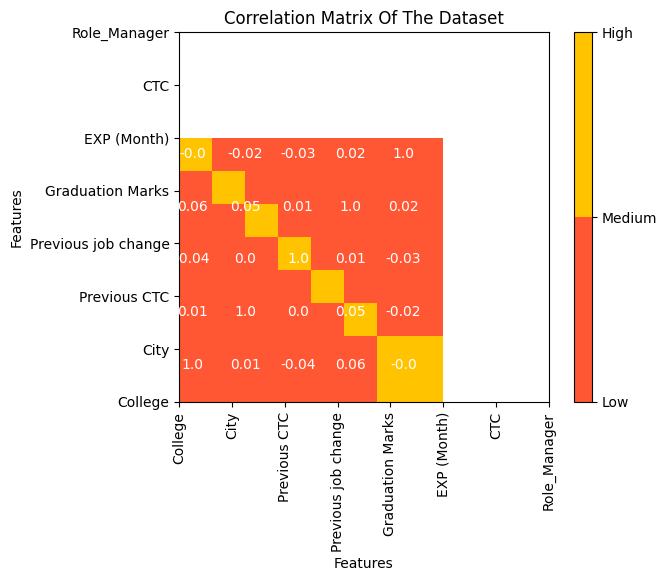

In [25]:
import matplotlib.pyplot as plt
from matplotlib import colors

# Calculate correlation between columns
corr_matrix = df.corr()

# Create a custom color
# map with blue and green colors
colors_list = ['#FF5733', '#FFC300']
cmap = colors.ListedColormap(colors_list)

# Plot the heatmap with custom colors and annotations
plt.imshow(corr_matrix, cmap=cmap, vmin=0\
		, vmax=1, extent=[0, 5, 0, 5])
for i in range(5):
	for j in range(5):
		plt.annotate(str(round(corr_matrix.values[i][j], 2)),\
					xy=(j+0.25, i+0.7),
					ha='center', va='center', color='white')

# Add colorbar
cbar = plt.colorbar(ticks=[0, 0.5, 1])
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

# Set plot title and axis labels
plt.title("Correlation Matrix Of The Dataset")
plt.xlabel("Features")
plt.ylabel("Features")

# Set tick labels
plt.xticks(range(len(corr_matrix.columns)),\
		corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)),
		corr_matrix.columns)

# Display the plot
plt.show()


Now Let's see and handle the outliers , outliers can be dengerious to our ML models brain and health so we need to handle it carefully. 1st let's see in old fashoined way

In [31]:
percent25 = df['Previous CTC'].quantile(0.25)
percent75 = df['Previous CTC'].quantile(0.75)

In [33]:
iqr = percent75-percent25

In [28]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [29]:
print(iqr)

9591.0


In [30]:
print(upper_limit)
print(lower_limit)

74495.5
36131.5


As "Predicting salary of the employee" is our main goal,so "Previous CTC" feature will be playing crusial role, for that reason we will not do anyting to this feature also the outliers are not extreme.

In [32]:
# Now let's see the CTC feature in same way
percent25 = df['CTC'].quantile(0.25)
percent75 = df['CTC'].quantile(0.75)

In [34]:
iqr = percent75-percent25
print(iqr)

13686.319999999992


In [35]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [38]:
print(upper_limit)
print(lower_limit)

101118.15
46372.87000000002


In [39]:
# as we are handling a regression problem here , its better we scale our independent features
from sklearn.preprocessing import StandardScaler

In [40]:
# Split data into independent and dependent / target variable
X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
scaler=StandardScaler()

In [44]:
# Scale the features in the training data using a previously fitted scaler
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the test data using the same scaler to ensure consistency
X_test_scaled = scaler.transform(X_test)

In [45]:
# Let's see the values after scaling
df_X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

***Now let's create diff models on the scaled data and see the performance results***

In [47]:
# Importing the necesary models and metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
# Create a LinearRegression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
linear_reg_pred = linear_reg.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, linear_reg_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_reg.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_reg.intercept_)

r2_score: 0.5933517958385095
MAE: 7191.23106750003
MSE: 77362774.94956532

Coef: [5.17509158e+02 4.82800374e+02 4.22242899e-01 8.74331790e+00
 1.94023127e+00 2.43718541e+02 1.86020838e+04]
Intercept: 37159.529496695206


In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# Fit the model to training data
ridge.fit(X_train, y_train)

# Make prediction on test data
ridge_predict = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, ridge_predict))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, ridge_predict))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, ridge_predict))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge.intercept_)

r2_score: 0.5926580862926117
MAE: 7198.215276305912
MSE: 77494749.7005428

Coef: [5.16821192e+02 4.76920014e+02 4.22312444e-01 7.76895529e+00
 1.98601422e+00 2.43648895e+02 1.85111317e+04]
Intercept: 37180.937086545324


In [50]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# Fit model with train data
lasso.fit(X_train, y_train)

# Make prediction on test data
lasso_pred = lasso.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_pred))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, lasso_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lasso.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lasso.intercept_)

r2_score: 0.5933030911807144
MAE: 7191.7094203244
MSE: 77372040.76567228

Coef: [5.16164197e+02 4.78595253e+02 4.22241674e-01 8.05923215e+00
 1.93522068e+00 2.43703723e+02 1.85954658e+04]
Intercept: 37168.432177131945


In [51]:
# Create a DecisionTreeRegressor model
dtr = DecisionTreeRegressor()

# Train the model using the training data
dtr.fit(X_train, y_train)

# Train the model using the training data
dtr_pred = dtr.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.300515319344015
MAE: 8431.36465408805
MSE: 133073441.3098931


In [52]:
# Create Decision tree with max depth = 4
dtr_tuned = DecisionTreeRegressor(max_depth=4)

# Fit model with train data
dtr_tuned.fit(X_train, y_train)

# Make prediction on test data
dtr_tuned_pred = dtr_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_tuned_pred))

r2_score: 0.5974129112852863
MAE: 6780.081301726804
MSE: 76590168.16773768


In [53]:
# Create Random Forest regression with tuned parameters
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model on train data
rnd_tuned.fit(X_train, y_train)

# Make prediction on test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))


r2_score: 0.6434600698166697
MAE: 6333.059468414125
MSE: 67829927.92549704


In [54]:
# Parameters
params_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [55]:
# Find best parameter for model
grid_search = GridSearchCV(rnd_tuned, params_grid, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=5,
                                             min_samples_split=3, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

In [56]:
# Best parameters
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2}

### Now Let's try with some different and advance methods (Ensemble Methods)

In [58]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6226425281084653

In [59]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5838488343131811

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6171118377746482

In [61]:
import xgboost as xgb
model=xgb.XGBRegressor(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5083694583847189

As we can understand based on scores of different models we can chose any of the best score giving models

### Observation & Conclusion
*  As i'm the soul decider of the salary of an employee, will be chosing ***DecissionTreeRegressor & RandomForest*** simply because they performed and gave good accuracy in this analysis and with current available data,though these models can be scalable in future but that time we have consider other new important features also.
Performance of these models can be increase by adding more features and data poitns, different level of hyperparameter tuning,